#### * What I need to do.
A note specifying which dataset you analyzed

A statement of the question(s) you posed

A description of what you did to investigate those questions

Documentation of any data wrangling you did

Summary statistics and plots communicating your final results

### 1. Dataset 
Titanic Data: As you can see from the following output, there are 12 variables and the number of passengers are 891.

In [2]:
#import unicodecsv
import pandas as pd
import numpy as np

#def read_csv(filename):
#    with open(filename, 'rb') as f:
#        reader = unicodecsv.DictReader(f)
#        return list(reader)

# Read the dataset|
path = r'C:/Users/Jungmin/Downloads/titanic_data.csv'
dataFrame = pd.read_csv(path)

# Print the first row
print dataFrame.iloc[0]

# Print the number of row
print len(dataFrame) 

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object
891


In [3]:
# Check the data type
print dataFrame.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### 2. The question
What factors made people more likely to survive?

### 3. Important Variables
Dependent variable: Survived / Independent variables: Pclass, Sex, Age, SibSp, Parch

According to the description of this dataset, Pclass represents the socio-economy status(SES). Therefore, to look up the relationship between the wealth and the survival rate, Pclass is great indicator instead of Ticket and Fare. 
I assume that people tried to save more females than males.
I assume that people tried to save more children and seniors than young adults.
I assume that if a person had members of family, they would be easy to survive because they could help each other. Finally, I think that variables, Name, Cabin, and Embarked, are not significantly important whether to survive.

### 4. Data manupulation
Since I will not use five variables(Name, Tiket, Fare, Cabin, and Embarked) to investigate, I will clean them.

In [4]:
# Remove five columns that I don't use
dataFrame.drop(dataFrame.columns[[3,8,9,10,11]], axis=1, inplace=True)

# Print the first row
print dataFrame.iloc[0]

PassengerId       1
Survived          0
Pclass            3
Sex            male
Age              22
SibSp             1
Parch             0
Name: 0, dtype: object


In [5]:
# Calculate number of missing values in each column. 
for col_name in dataFrame.columns:
    print ('{0}: {1}'.format(col_name,sum(dataFrame[col_name].isnull())))

PassengerId: 0
Survived: 0
Pclass: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0


In [6]:
# To avoid missing values distracting the analysis, drop the rows which have missing values
dataFrame.dropna()
# Display all the rows which have missing values in 'District' Column:
#dataFrame.ix[dataFrame['Age'].isnull()] 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
6,7,0,1,male,54.0,0,0
7,8,0,3,male,2.0,3,1
8,9,1,3,female,27.0,0,2
9,10,1,2,female,14.0,1,0
10,11,1,3,female,4.0,1,1


After I cleaned the data, there are 714 rows left.

To distinguish children and seniors from young adults, I made a new column which is called "Generation".
I defined chilren as people who are under 16 and seniors as people who are over 60.

To distinguish whether he/she had a member of family in Titanic, I made a new column which is called "Family"
If the number of SibSp and the number of Parch are both 0, it means he/she didn't have any member of famiily in Titanic. 

In [7]:
def generation(passenger):
    age = passenger
    if age<16:
        return 'Child'
    elif age>60:
        return 'Senior'
    else:
        return 'YoungAdult'
    
def family(passenger):
    sibsp, parch = passenger
    if sibsp==0 and parch==0:
        return 'Alone'
    else:
        return 'NotAlone'
    
dataFrame['Generation'] = dataFrame['Age'].apply(generation)
dataFrame['Family'] = dataFrame[['SibSp','Parch']].apply(family, axis=1)
dataFrame['Survivor'] = dataFrame.Survived.map({0:"no",1:"yes"})

# Remove four columns that I don't use
dataFrame.drop(dataFrame.columns[[4,5,6]], axis=1, inplace=True)

print dataFrame[0:10]

   PassengerId  Survived  Pclass     Sex  Generation    Family Survivor
0            1         0       3    male  YoungAdult  NotAlone       no
1            2         1       1  female  YoungAdult  NotAlone      yes
2            3         1       3  female  YoungAdult     Alone      yes
3            4         1       1  female  YoungAdult  NotAlone      yes
4            5         0       3    male  YoungAdult     Alone       no
5            6         0       3    male  YoungAdult     Alone       no
6            7         0       1    male  YoungAdult     Alone       no
7            8         0       3    male       Child  NotAlone       no
8            9         1       3  female  YoungAdult  NotAlone      yes
9           10         1       2  female       Child  NotAlone      yes


### 5. Data exploration

Populating the interactive namespace from numpy and matplotlib


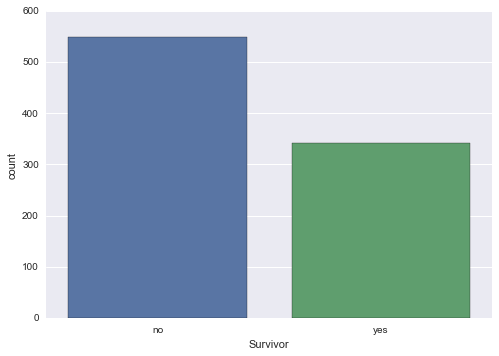

In [8]:
%pylab inline
import seaborn as sns

sns.countplot('Survivor',data=dataFrame)

In [9]:
dataFrame['Survivor'].value_counts()

no     549
yes    342
Name: Survivor, dtype: int64

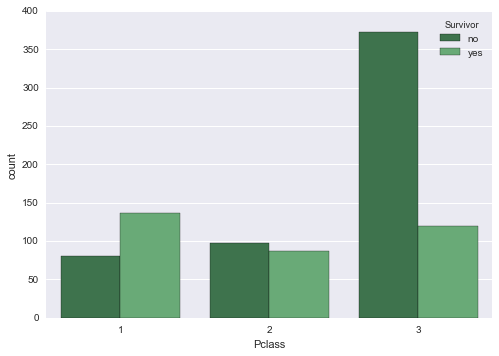

In [10]:
sns.countplot(x="Pclass", hue="Survivor", data=dataFrame, palette="Greens_d")

According to the above graph, it seems like the higer class people could survive more than the lower class people.

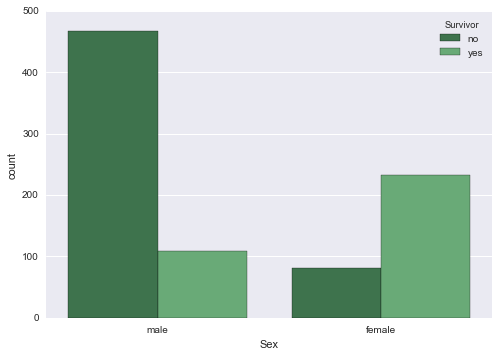

In [11]:
sns.countplot(x="Sex", hue="Survivor", data=dataFrame, palette="Greens_d")

According to the above graph, it seems like females could survive more than males.

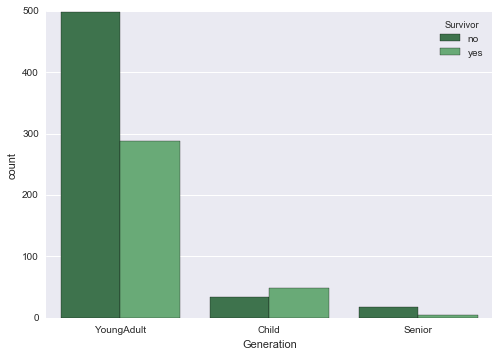

In [12]:
sns.countplot(x="Generation", hue="Survivor", data=dataFrame, palette="Greens_d")

According to the above graph, it seems like children could survive more than others.

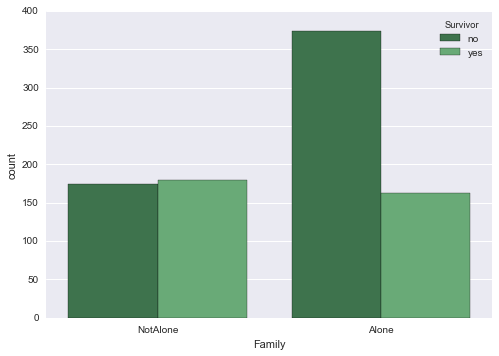

In [13]:
sns.countplot(x="Family", hue="Survivor", data=dataFrame, palette="Greens_d")

According to the above graph, it seems like people who have a member of family could survive more than people who are alone.

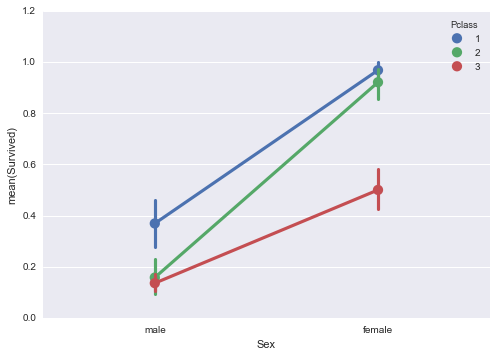

In [14]:
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=dataFrame)

According to the above graph, it seems like females who belong to higher class could survive more than others.

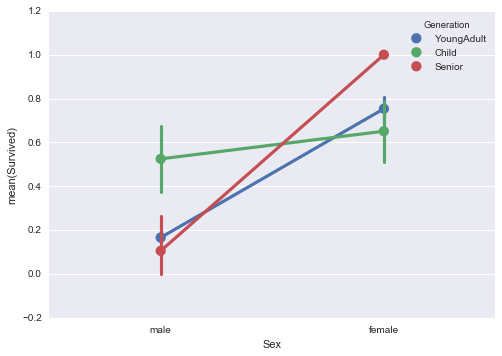

In [15]:
sns.pointplot(x="Sex", y="Survived", hue="Generation", data=dataFrame)

According to the above graph, it seems like in case of males, the yougner they are, the more they could survive, but in case of females, the older they are, the more they could survive.

By using Chi-square test, we can see there are some association between two categorical variables.

In [18]:
import scipy.stats

# Contingency table of observed counts(Pclass)
ctPclass = pd.crosstab(dataFrame['Survivor'], dataFrame['Pclass'])
print ctPclass

Pclass      1   2    3
Survivor              
no         80  97  372
yes       136  87  119


In [19]:
# Column percentages(Pclass)
colsum = ctPclass.sum(axis=0)
colpct = ctPclass/colsum
print (colpct)

Pclass          1         2         3
Survivor                             
no        0.37037  0.527174  0.757637
yes       0.62963  0.472826  0.242363


In [20]:
# Chi-square(Pclass)
print 'chi-square value, p value, expected counts'
csPclass = scipy.stats.chi2_contingency(ctPclass)
print (csPclass)

chi-square value, p value, expected counts
(102.88898875696056, 4.5492517112987927e-23, 2L, array([[ 133.09090909,  113.37373737,  302.53535354],
       [  82.90909091,   70.62626263,  188.46464646]]))


In [21]:
# Contingency table of observed counts(Sex)
ctSex = pd.crosstab(dataFrame['Survivor'], dataFrame['Sex'])
print ctSex

Sex       female  male
Survivor              
no            81   468
yes          233   109


In [22]:
# Column percentages(Sex)
colsum = ctSex.sum(axis=0)
colpct = ctSex/colsum
print (colpct)

Sex         female      male
Survivor                    
no        0.257962  0.811092
yes       0.742038  0.188908


In [23]:
# Chi-square(Sex)
print 'chi-square value, p value, expected counts'
csSex = scipy.stats.chi2_contingency(ctSex)
print (csSex)

chi-square value, p value, expected counts
(260.71702016732104, 1.1973570627755645e-58, 1L, array([[ 193.47474747,  355.52525253],
       [ 120.52525253,  221.47474747]]))


In [24]:
# Contingency table of observed counts(Generation)
ctGeneration = pd.crosstab(dataFrame['Survivor'], dataFrame['Generation'])
print ctGeneration

Generation  Child  Senior  YoungAdult
Survivor                             
no             34      17         498
yes            49       5         288


In [25]:
# Column percentages(Generation)
colsum = ctGeneration.sum(axis=0)
colpct = ctGeneration/colsum
print (colpct)

Generation     Child    Senior  YoungAdult
Survivor                                  
no          0.409639  0.772727    0.633588
yes         0.590361  0.227273    0.366412


In [26]:
# Chi-square(Generation)
print 'chi-square value, p value, expected counts'
csGeneration = scipy.stats.chi2_contingency(ctGeneration)
print (csGeneration)

chi-square value, p value, expected counts
(18.257701792290582, 0.00010849017998339112, 2L, array([[  51.14141414,   13.55555556,  484.3030303 ],
       [  31.85858586,    8.44444444,  301.6969697 ]]))


In [27]:
# Contingency table of observed counts(Family)
ctFamily = pd.crosstab(dataFrame['Survivor'], dataFrame['Family'])
print ctFamily

Family    Alone  NotAlone
Survivor                 
no          374       175
yes         163       179


In [28]:
# Column percentages(Family)
colsum = ctFamily.sum(axis=0)
colpct = ctFamily/colsum
print (colpct)

Family       Alone  NotAlone
Survivor                    
no        0.696462   0.49435
yes       0.303538   0.50565


In [29]:
# Chi-square(Family)
print 'chi-square value, p value, expected counts'
csFamily = scipy.stats.chi2_contingency(ctFamily)
print (csFamily)

chi-square value, p value, expected counts
(36.00051446773864, 1.9726543846517183e-09, 1L, array([[ 330.87878788,  218.12121212],
       [ 206.12121212,  135.87878788]]))


As you can see from the results of Chi-square tests, there is an assoication only between Generation and Survivor when the significance level is 0.05.

### 6. Conclusion 

There is no perfect way to deal with missing values. During the data wrangling phase, I tried to remove missing values. However, there are pros and cons. Actually, if we can research about the missing data and finaly find the real value, it would be good. However, I thought the cost and effort of patching the data up are more than throw the data out. In addition, by ommitting the missing values, there can be some bias, but in this case, I didn't think 177 missing value would be fatal.

Futhermore, I cleaned a few variables, and there could be meaningful variables such as Fare and Cabin because Fare can  be one of indicators showing passenger's wealth and be used when we calculate correlation and Cabin can be used to analyze survivors by proximity. However, the reason I didn't use those variables is that there is not enough information which explains about Fare and there are a lot of missing data for Cabin. I could't push ahead with uncertainty and bias.

Finally, as I analyzed, there are some factors made people more likely to survive. It seems like that passengers tried to rescue children, females, and higher class people first. But, by Chi-square test, I could recognize there is only one really important factor, Generation. In addition, there is one thing that we need to be careful. We can say there is a correlation between this factor and survivors. However, we can't say there is a cause and effect relationship because correlation doesn't imply causation. If these relationships happen normally and reasonably, there might be a causal relationship, but only with Titanic case, I can't say this is a causal relationship.